<a href="https://colab.research.google.com/github/wanderloop/WanderlustAI/blob/master/coo_to_midpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import linspace, min, max, sqrt, ravel
from pandas import DataFrame, read_csv, concat
!pip install pandas_profiling==2.8.0
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
!pip install hummingbird-ml
from hummingbird.ml import convert
from gc import collect
from io import BytesIO
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ONNX runtime not installed. Please check https://github.com/microsoft/onnxruntime#installation for instructions.
ONNX runtime not installed. Please check https://github.com/microsoft/onnxruntime#installation for instructions.


Saving assumed_pha_thousand.csv to assumed_pha_thousand.csv


In [ ]:
df = read_csv(BytesIO(uploaded['assumed_pha_thousand.csv']))
df.fillna(df.median(axis=0), # Fills median values in row
          inplace=True,)
df.head()

X1   Y1    X2   Y2  ...       long        lat  Long_minus  Lat_minus
0   297  395   343  519  ...  24.920860  67.143323          86        323
1   839  315   870  404  ...  24.920899  67.143506         899        506
2  1223  284  1256  361  ...  24.920841  67.143605         841        605
3   871  270   896  334  ...  24.920933  67.143584         933        584
4   421  294   450  367  ...  24.921013  67.143442        1013        442

[5 rows x 11 columns]

In [ ]:
print(df.columns.values)

['X1' 'Y1' 'X2' 'Y2' 'MID_POINT_X' 'MID_POINT_Y' 'Area' 'long' 'lat'
 'Long_minus' 'Lat_minus']


In [ ]:
df.rename(columns={'MID_POINT_X': 'MPX',
                   'MID_POINT_Y': 'MPY',
                   'Long_minus': 'Long_m',
                   'Lat_minus': 'Lat_m',},
          inplace=True,)
df.head()

X1   Y1    X2   Y2     MPX  ...  Area       long        lat  Long_m  Lat_m
0   297  395   343  519   320.0  ...  5704  24.920860  67.143323      86    323
1   839  315   870  404   854.5  ...  2759  24.920899  67.143506     899    506
2  1223  284  1256  361  1239.5  ...  2541  24.920841  67.143605     841    605
3   871  270   896  334   883.5  ...  1600  24.920933  67.143584     933    584
4   421  294   450  367   435.5  ...  2117  24.921013  67.143442    1013    442

[5 rows x 11 columns]

In [ ]:
df.tail()

X1   Y1    X2   Y2     MPX  ...   Area       long        lat  Long_m  Lat_m
13  1097  236  1117  274  1107.0  ...    760  24.921000  67.143724    1000    724
14   870  274   897  343   883.5  ...   1863  24.920927  67.143555     927    555
15   215  409   264  535   239.5  ...   6174  24.920873  67.143292     873    292
16   270  548   342  689   306.0  ...  10152  24.920829  67.143271     829    271
17   358  536   429  682   393.5  ...  10366  24.920827  67.143284     827    284

[5 rows x 11 columns]

In [ ]:
df1, df2 = df.head(), df.tail()
conc_data_row = concat([df1,
                        df2,],
                        axis=0, # Adds dataframes in row
                        ignore_index=False,)
conc_data_row

X1   Y1    X2   Y2     MPX  ...   Area       long        lat  Long_m  Lat_m
0    297  395   343  519   320.0  ...   5704  24.920860  67.143323      86    323
1    839  315   870  404   854.5  ...   2759  24.920899  67.143506     899    506
2   1223  284  1256  361  1239.5  ...   2541  24.920841  67.143605     841    605
3    871  270   896  334   883.5  ...   1600  24.920933  67.143584     933    584
4    421  294   450  367   435.5  ...   2117  24.921013  67.143442    1013    442
13  1097  236  1117  274  1107.0  ...    760  24.921000  67.143724    1000    724
14   870  274   897  343   883.5  ...   1863  24.920927  67.143555     927    555
15   215  409   264  535   239.5  ...   6174  24.920873  67.143292     873    292
16   270  548   342  689   306.0  ...  10152  24.920829  67.143271     829    271
17   358  536   429  682   393.5  ...  10366  24.920827  67.143284     827    284

[10 rows x 11 columns]

In [ ]:
del conc_data_row
collect()

44

In [ ]:
del df1
collect()

0

In [ ]:
del df2
collect()

0

In [ ]:
assert df['X1'].notnull().all()
assert df['Y1'].notnull().all()
assert df['X2'].notnull().all()
assert df['Y2'].notnull().all()
assert df['MPX'].notnull().all()
assert df['MPY'].notnull().all()
assert df['Area'].notnull().all()
assert df['long'].notnull().all()
assert df['lat'].notnull().all()
assert df['Long_m'].notnull().all()
assert df['Lat_m'].notnull().all()

In [ ]:
print('Duplicated entries:',
      df.duplicated().sum())
df[df.duplicated()].isna().median()

Duplicated entries: 0


X1       NaN
Y1       NaN
X2       NaN
Y2       NaN
MPX      NaN
MPY      NaN
Area     NaN
long     NaN
lat      NaN
Long_m   NaN
Lat_m    NaN
dtype: float64

In [ ]:
df.drop_duplicates(keep='first',
                   inplace=True,)
print(df.shape, "Duplicated rows have been removed.")

(18, 11) Duplicated rows have been removed.


In [ ]:
# Dropping columns with more than 50% missing values
df = df.dropna(thresh=df.shape[0]*0.5,
               how='all',
               axis=1,)

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      18 non-null     int64  
 1   Y1      18 non-null     int64  
 2   X2      18 non-null     int64  
 3   Y2      18 non-null     int64  
 4   MPX     18 non-null     float64
 5   MPY     18 non-null     float64
 6   Area    18 non-null     int64  
 7   long    18 non-null     float64
 8   lat     18 non-null     float64
 9   Long_m  18 non-null     int64  
 10  Lat_m   18 non-null     int64  
dtypes: float64(4), int64(7)
memory usage: 1.7 KB


In [ ]:
profile = ProfileReport(df,
                        title='Coo-Midpoint Report',
                        explorative=True,
                        progress_bar=True,)
profile.to_notebook_iframe()

In [ ]:
del profile
collect()

364206

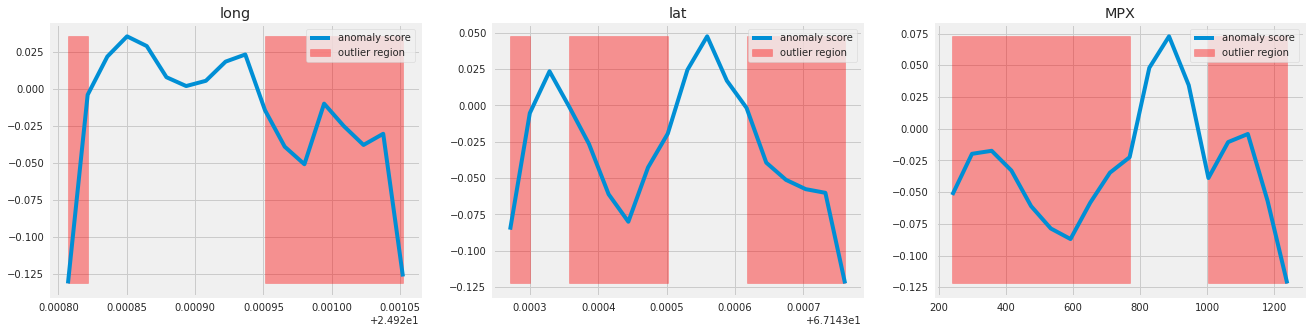

In [ ]:
cols = ['long',
        'lat',
        'MPX',]
fig, axs = plt.subplots(1,
                        3,
                        figsize=(20, 5),
                        facecolor='w',
                        edgecolor='k',)
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(df[column].values.reshape(-1,1))

    xx = linspace(df[column].min(),
                  df[column].max(),
                  len(df)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx,
                anomaly_score,
                label='anomaly score',)
    axs[i].fill_between(xx.T[0],
                        min(anomaly_score),
                        max(anomaly_score), 
                        where=outlier==-1,
                        color='r', 
                        alpha=.4,
                        label='outlier region',)
    axs[i].legend(frameon=True)
    axs[i].set_title(column)

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.fit_transform(df)

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
del scaled_df
collect()

61

In [ ]:
any(df.long <= 0)

False

In [ ]:
any(df.lat <= 0)

False

In [ ]:
any(df.MPX <= 0)

False

In [ ]:
X = df[['long',
        'lat',]]
y = df['MPX']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,)

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [ ]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [ ]:
X_train

array([[ 0.15912252,  0.45085264],
       [ 1.21177922, -0.27769575],
       [-0.89353417,  0.77321918],
       [-1.04041651, -1.38018932],
       [-1.06489689, -1.29637402],
       [ 1.54226447,  0.24453805],
       [ 1.6891468 ,  1.62426685],
       [ 1.0526567 ,  1.54045155],
       [-0.75889204,  0.50243128],
       [ 0.23256369,  0.63782523],
       [-0.66097049, -1.04492812],
       [-1.30970078, -0.98045481],
       [-0.50184796, -1.24479538],
       [ 0.34272544,  0.45085264]])

In [ ]:
regr.fit(X_train,
         y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
del X_train
collect()

0

In [ ]:
del y_train
collect()

0

In [ ]:
model = convert(regr, 'pytorch')
print(type(model))

<class 'hummingbird.ml._container.PyTorchBackendModelRegression'>


In [ ]:
model.to('cuda')

PyTorchBackendModelRegression(
  (operator_map): ModuleDict(
    (SklearnLinearRegression): SklearnLinearModel()
  )
)

In [ ]:
y_pred = regr.predict(X_test)
print(X_test)
print(y_pred)

print('Coefficients:', 
      regr.coef_,)

print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test,
                            y_pred.ravel(),))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test,
                           y_pred.ravel(),))

print('Root mean square error: %.2f'
      % sqrt(mean_squared_error(y_test,
                                y_pred.ravel(),)))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, 
                 y_pred.ravel(),))

[[-1.57003012 -0.33878918]
 [ 0.00480132  1.32258082]
 [ 1.17632226  0.41697129]
 [ 0.38890654 -1.40076294]]
[[ 0.58662677]
 [ 1.6428871 ]
 [-0.23649352]
 [-1.99302035]]
Coefficients: [[-0.6421881   1.24451408]]
Mean absolute error: 0.37
Mean squared error: 0.14
Root mean square error: 0.37
Coefficient of determination: 0.86


In [ ]:
explained_variance_score(y_test,
                         y_pred.ravel(),)

0.8612983784580068

In [ ]:
del X_test
collect()

0

In [ ]:
del y_test
collect()

0

In [ ]:
regr.predict([[24.920925,
               67.143550,]])

array([[67.55717167]])